# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
### Guideline for convenience ###

In [2]:
# colab 사용할 경우
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 현재 디렉터리 위치 확인
!pwd

/content


In [4]:
# python에서 파일 관리해주는 라이브러리
import os
import glob
import shutil

In [5]:
# 압축 풀기
!unzip -qq "/content/drive/MyDrive/[0823] CNN/animals10.zip"

replace Animals-10/butterfly/butterfly (1).jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
!ls

Animals-10  drive  sample_data


In [7]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

path = './Animals-10'
animal_list = os.listdir(path)

def class_file(animal):
    name = sorted(glob.glob(f'./Animals-10/{animal}/*'))
    return name, len(name)

animal_dict = {}        # 각 class별 파일명
animal_len_dict = {}    # 각 class별 파일 개수

for animal in animal_list:
    name, animal_len = class_file(animal)
    animal_dict[f'{animal}'] = name
    animal_len_dict[f'{animal}'] = animal_len

for animal in animal_list:
    print(f'{animal:10} {animal_len_dict[f"{animal}"]}')

cat        1668
cow        1866
chicken    3098
horse      2623
elephant   1446
sheep      1820
butterfly  2112
dog        4863
spider     4821
squirrel   1862


In [8]:
# test에 넣을 이미지 개수 계산 (test: 전체의 30%)

animal_test_len_dict = {}   # 각 class별 test 파일 개수

for animal in animal_len_dict:
    animal_test_len_dict[f'{animal}'] = round(animal_len_dict[animal]*0.3)

for animal in animal_test_len_dict:
    print(f'{animal:10} {animal_test_len_dict[f"{animal}"]}')

cat        500
cow        560
chicken    929
horse      787
elephant   434
sheep      546
butterfly  634
dog        1459
spider     1446
squirrel   559


In [9]:
# 디렉터리 삭제 코드
#import shutil
#shutil.rmtree("/content/test")
#shutil.rmtree("/content/train")

In [10]:
# train, test 폴더 경로 선언 & 만들기

for animal in animal_list:
    globals()[f'{animal}_train_path'] = f'./train/{animal}'
    globals()[f'{animal}_test_path'] = f'./test/{animal}'
    os.makedirs(globals()[f'{animal}_train_path'], exist_ok=True)
    os.makedirs(globals()[f'{animal}_test_path'], exist_ok=True)

cf. globals(): 파이썬 동적 변수 생성  
참고: https://trustyou.tistory.com/197



In [11]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

import random

def split(img_list, test_count, train_path, test_path):
  # img_list:   이미지 경로 리스트
  # test_count: test에 할당할 이미지 개수
  # train_path: train 데이터 넣을 경로
  # test_path:  test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [12]:
for animal in animal_list:
    split(animal_dict[animal],                  # 이미지 경로 리스트
          animal_test_len_dict[animal],         # test에 할당할 이미지 개수
          globals()[f'{animal}_train_path'],    # train 데이터 넣을 경로
          globals()[f'{animal}_test_path'])     # test 데이터 넣을 경로

train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [13]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [14]:
# sample image 확인
sample_1_path = './train/cat/cat (10).jpeg'
sample_1_img = Image.open(sample_1_path)
sample_1_img_np = np.array(sample_1_img)

sample_2_path = './train/cat/cat (110).jpeg'
sample_2_img = Image.open(sample_2_path)
sample_2_img_np = np.array(sample_2_img)

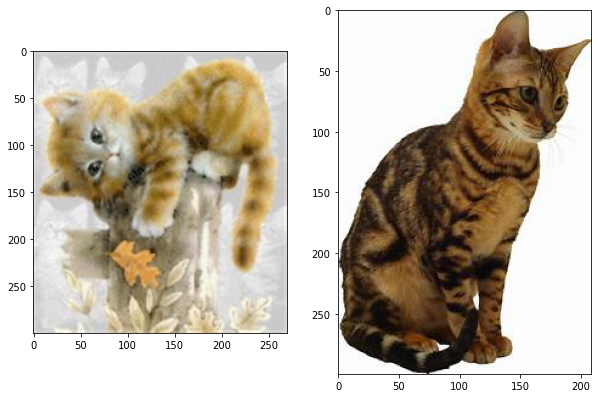

In [15]:
fig = plt.figure(figsize=(10, 24))
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(sample_1_img_np)

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(sample_2_img_np)

plt.show()

## Transform Function 정의

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms

In [17]:
# sample image를 Tensor로 변환
transform_func = transforms.Compose([transforms.ToTensor(),])
sample_1_img_ts = transform_func(sample_1_img)
sample_1_img_ts.shape

torch.Size([3, 300, 270])

In [18]:
# sample image의 mean, std 구하기
mean, std = sample_1_img_ts.mean([1, 2]), sample_1_img_ts.std([1, 2])
mean, std

(tensor([0.7411, 0.6906, 0.5860]), tensor([0.1631, 0.1860, 0.2545]))

In [19]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

transform_train = transforms.Compose([
    transforms.Resize(224),          # 224*(x) 
    transforms.CenterCrop(224),      # 224*224
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)  # normalize
])

transform_test = transforms.Compose([
    transforms.Resize(224),          # 224*(x) 
    transforms.CenterCrop(224),      # 224*224
    transforms.ToTensor(),
    transforms.Normalize(mean, std)  # normalize
])

In [20]:
# transform function 확인
sample_1_img_trs = transform_train(sample_1_img)
mean_trs, std_trs = sample_1_img_trs.mean([1, 2]), sample_1_img_trs.std([1, 2])
mean_trs, std_trs

(tensor([-0.2629, -0.2454, -0.1980]), tensor([1.3341, 1.2243, 1.0769]))

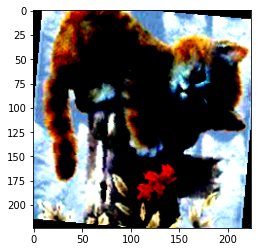

In [21]:
sample_1_trs_np = np.array(sample_1_img_trs)
sample_augmented_trs = sample_1_trs_np.transpose(1,2,0)
imshow(sample_augmented_trs)

## Dataset 객체 선언

In [22]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_dataset_animal = torchvision.datasets.ImageFolder(
    root = './train',          # train 폴더 지정
    transform = transform_train)

test_dataset_animal = torchvision.datasets.ImageFolder(
    root = './test',           # test 폴더 지정
    transform = transform_test)

## Dataset 객체 확인

In [23]:
# Dataset 확인: 총 개수
animal_train_len = []
animal_test_len = []

for animal in animal_list:
    train_path = globals()[f'{animal}_train_path']
    test_path = globals()[f'{animal}_test_path']
    train_len = len(glob.glob(train_path+'/*'))
    test_len = len(glob.glob(test_path+'/*'))
    animal_train_len.append(train_len)
    animal_test_len.append(test_len)

train_sum = sum(animal_train_len)
test_sum = sum(animal_test_len)

print(train_sum, test_sum)
print(len(train_dataset_animal), len(test_dataset_animal))

18325 7854
18325 7854


In [24]:
# Dataset 확인: train dataset의 첫 번째 img
train_dataset_animal[0][0].shape, train_dataset_animal[0][1]

(torch.Size([3, 224, 224]), 0)

## DataLoader 정의

In [25]:
# train, test에 대해 DataLoader 정의
trainloader_animal = torch.utils.data.DataLoader(
    train_dataset_animal,
    batch_size = 32,      
    shuffle=True,         # test dataloader: shuffle O
    num_workers=2
)

testloader_animal = torch.utils.data.DataLoader(
    test_dataset_animal,
    batch_size = 32,      
    shuffle=False,        # test dataloader: shuffle X
    num_workers=2
)

## DataLoader 확인

In [26]:
# DataLoader의 길이 = iteration = (data개수) / (batchsize)
# 18325 / 32 = 573
# 7854 / 32 = 246

print(len(trainloader_animal), 
      len(testloader_animal))

573 246


In [27]:
# test_dataset_animal에서 4개만 가져와서 확인
tmploader_cifar = torch.utils.data.DataLoader(test_dataset_animal, batch_size = 4, shuffle=False)
dataiter = iter(tmploader_cifar)
images, labels = dataiter.next()

In [28]:
images.shape # 4개 img (batch size, C, H, W)

torch.Size([4, 3, 224, 224])

In [29]:
labels.shape # 4개 label

torch.Size([4])

In [30]:
# animal의 class
classes = ('butterfly', 'cat', 'chicken', 'cow', 'dog',
           'elephant', 'horse', 'sheep', 'spider', 'squirrel')

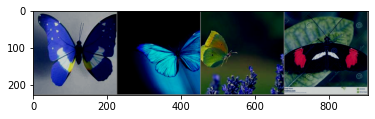

butterfly butterfly butterfly butterfly


In [31]:
def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img)
    imshow(np.transpose(img_np, (1,2,0)))
    plt.show()

imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Model 클래스 정의

In [32]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?: 클래스가 10개이므로 10

In [33]:
import torch.nn as nn

In [34]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Weight Initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode="fan_out", nonlinearity="relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
        
        ##### Layer 정의 #####
        self.layer = nn.Sequential(
            # 맨처음 RGB 채널 3개이므로 가장 처음 in_channels = 3
            # img의 가장 첫 차원이 batch_size 값은 계속해서 유지
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=2, padding=1),  # [batch_size,3,224,224] -> [batch_size,16,111,111]
            nn.ReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5),                      # [batch_size,16,111,111] -> [batch_size,32,107,107]
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                          # [batch_size,32,107,107] -> [batch_size,32,53,53]

            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),                      # [batch_size,32,53,53] -> [batch_size,64,51,51]
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),                     # [batch_size,64,51,51] -> [batch_size,128,49,49]
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),                                          # [batch_size,128,49,49] -> [batch_size,128,24,24]

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),                    # [batch_size,128,24,24] -> [batch_size,256,22,22]
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),                    # [batch_size,256,22,22] -> [batch_size,512,20,20]
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2)                                           # [batch_size,512,20,20] -> [batch_size,512,10,10]
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(512*10*10,100),                                                       # [batch_size,512*10*10] -> [batch_size,100]
            nn.ReLU(),
            nn.Linear(100,10)
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

## Model 클래스 확인

In [ ]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기
from torchsummary import summary

test_model = MyModel()
summary(test_model, (3,224,224), batch_size=32)

## Device 설정 & Model 객체 선언

In [35]:
# Device 선언 (GPU 권장)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [36]:
# 모델 객체 선언
mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Dropout(p=0.2, inplace=False)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (15): ReLU()
    (16): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (17): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_sta

## Loss function, Optimizer 정의

In [37]:
# loss func, optimizer 정의
criterion = nn.CrossEntropyLoss().to(device)                                      # loss function (Cross Entropy)
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.001)  # Optimizer (Adam)

## Train & Test 함수 정의

In [38]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader_animal):
        inputs, targets = inputs.to(device), targets.to(device)
        print(inputs.shape)  # batch_size개의 이미지
        print(targets.shape) # batch_size개의 클래스

        outputs = mymodel(inputs)
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩)
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)

        loss = criterion(outputs, targets)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스
        print(targets)           # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.319774866104126
tensor([1, 8, 8, 3, 1, 8, 3, 1, 3, 5, 8, 8, 1, 8, 8, 8, 2, 1, 8, 3, 8, 1, 1, 1,
        2, 3, 8, 8, 8, 8, 1, 8], device='cuda:0')
tensor([8, 1, 6, 8, 4, 7, 2, 8, 3, 2, 2, 5, 2, 0, 6, 7, 1, 1, 4, 1, 4, 6, 5, 8,
        2, 7, 0, 8, 3, 8, 7, 4], device='cuda:0')
5


In [39]:
# 매 epoch마다의 loss, accuracy 값을 저장할 리스트
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [40]:
# train 함수 정의

def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader_animal):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 100 == 99:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 100 batches: {running_loss / 100}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', avg_loss)

In [41]:
# test 함수 정의

def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_animal):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

## Training

In [42]:
# training

num_epoch = 25

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장: parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_animal10.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 100
Average train loss of recent 100 batches: 3.7829034984111787

Current batch: 200
Average train loss of recent 100 batches: 2.179495621919632

Current batch: 300
Average train loss of recent 100 batches: 2.057823110818863

Current batch: 400
Average train loss of recent 100 batches: 1.997100954055786

Current batch: 500
Average train loss of recent 100 batches: 1.9068206501007081

Total train accuarcy: 29.042291950886767
Total train loss: 2.324050505956014

[ Test epoch: 1 ]

Test accuarcy: 33.027756557168324
Test average loss: 1.9352734098589517

[ Train epoch: 2 ]

Current batch: 100
Average train loss of recent 100 batches: 1.8581358075141907

Current batch: 200
Average train loss of recent 100 batches: 1.8215407919883728

Current batch: 300
Average train loss of recent 100 batches: 1.7785869634151459

Current batch: 400
Average train loss of recent 100 batches: 1.7445394396781921

Current batch: 500
Average train loss of recent 100 batches: 1.

## Loss, Accuracy 추이 확인

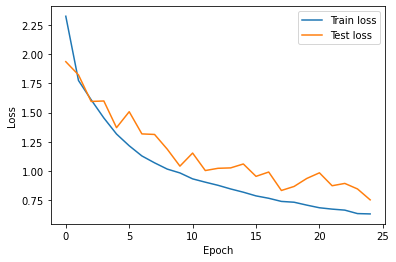

In [43]:
# loss 추이 확인
plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

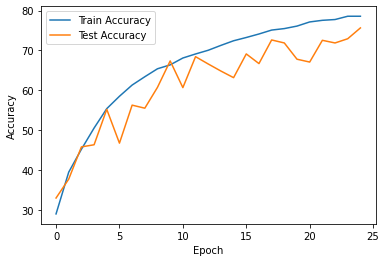

In [44]:
# accuracy 추이 확인
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()